<a href="https://colab.research.google.com/github/Ashutoshai/ImageProcessing/blob/master/AshutoshPandaSession4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


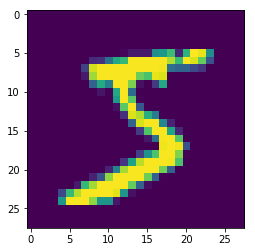

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

First CODE BLOCK Vanilla network (no BN, DropOut, LR, larger batch size, change in Optimizer, etc)

In [0]:
from keras.layers import Activation
model = Sequential()
model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1))) # 26 and receptive field 3
model.add(Convolution2D(13, 3, 3, activation='relu')) # 24 and receptive field 5
model.add(Convolution2D(20, 3, 3, activation='relu')) # 22 and receptive field 7
model.add(Convolution2D(13, 1, 1, activation='relu')) # 22 and receptive field 7
model.add(MaxPooling2D(pool_size=(2, 2))) # 11 and receptive field 14
model.add(Convolution2D(13, 3, 3, activation='relu'))# 9 and receptive field 16
model.add(Convolution2D(13, 3, 3, activation='relu')) # 7 and receptive field 18
model.add(Convolution2D(20, 3, 3, activation='relu'))  # 5 and receptive field 20

model.add(Convolution2D(10, 5))   # 1 and receptive field 22
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, 
          epochs=20, verbose=1, 
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_277 (Conv2D)          (None, 26, 26, 12)        120       
_________________________________________________________________
conv2d_278 (Conv2D)          (None, 24, 24, 13)        1417      
_________________________________________________________________
conv2d_279 (Conv2D)          (None, 22, 22, 20)        2360      
_________________________________________________________________
conv2d_280 (Conv2D)          (None, 22, 22, 13)        273       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 11, 11, 13)        0         
_________________________________________________________________
conv2d_281 (Conv2D)          (None, 9, 9, 13)          1534      
_________________________________________________________________
conv2d_282 (Conv2D)          (None, 7, 7, 13)        

Now the accuracy of Vanilla Network is 98.84

SECOND CODE BLOCK BatchNormalisation added to monitor the acccuracy Improvement

BatchNormalisation added after relu.

I have added BN after 1st convolution and 5th convolution

In [0]:
from keras.layers import Activation
model = Sequential()
model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1)))  # 26 and receptive field 3
model.add(BatchNormalization())
model.add(Convolution2D(13, 3, 3, activation='relu')) # 24 and receptive field 5
model.add(Convolution2D(20, 3, 3, activation='relu')) # 22 and receptive field 7
model.add(Convolution2D(13, 1, 1, activation='relu')) # 22 and receptive field 7
model.add(MaxPooling2D(pool_size=(2, 2)))  # 11 and receptive field 14
model.add(Convolution2D(13, 3, 3, activation='relu'))  # 9 and receptive field 16
model.add(BatchNormalization())
model.add(Convolution2D(13, 3, 3, activation='relu'))  # 7 and receptive field 18
model.add(Convolution2D(20, 3, 3, activation='relu'))  # 5 and receptive field 20
model.add(Convolution2D(10, 5))  # 1 and receptive field 22
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, 
          epochs=20, verbose=1, 
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_301 (Conv2D)          (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_117 (Bat (None, 26, 26, 12)        48        
_________________________________________________________________
conv2d_302 (Conv2D)          (None, 24, 24, 13)        1417      
_________________________________________________________________
conv2d_303 (Conv2D)          (None, 22, 22, 20)        2360      
_________________________________________________________________
conv2d_304 (Conv2D)          (None, 22, 22, 13)        273       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 11, 11, 13)        0         
_________________________________________________________________
conv2d_305 (Conv2D)          (None, 9, 9, 13)        

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch and stabilizes the learning process.

reduces need to get highly tuned hyper-parameters , helps to train network faster

Now Validation accurecy is higher i.e(99.02) then the previous network i.e Code Block1's accuracy

In [0]:
CODEBLOCK3 added dropout

In [0]:
from keras.layers import Activation
model = Sequential()
model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1)))  # 26 and receptive field 3
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(13, 3, 3, activation='relu'))  # 24 and receptive field 5
model.add(Convolution2D(20, 3, 3, activation='relu'))  # 22 and receptive field 7
model.add(Convolution2D(13, 1, 1, activation='relu'))  # 22 and receptive field 7
model.add(MaxPooling2D(pool_size=(2, 2)))  # 11 and receptive field 14
model.add(Convolution2D(13, 3, 3, activation='relu')) # 9 and receptive field 16
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(13, 3, 3, activation='relu'))  # 7 and receptive field 18
model.add(Convolution2D(20, 3, 3, activation='relu'))  # 5 and receptive field 20

model.add(Convolution2D(10, 5))# 1 and receptive field 22
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, 
          epochs=20, verbose=1, 
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/u

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_293 (Conv2D)          (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_115 (Bat (None, 26, 26, 12)        48        
_________________________________________________________________
dropout_91 (Dropout)         (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_294 (Conv2D)          (None, 24, 24, 13)        1417      
_________________________________________________________________
conv2d_295 (Conv2D)          (None, 22, 22, 20)        2360      
_________________________________________________________________
conv2d_296 (Conv2D)          (None, 22, 22, 13)        273       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 11, 11, 13)      

Apply dropout for Reduces the gap between TestAcc and TrainAcc.

Validation Accuracy 99.17

CODEBLOCK-4

In [0]:
from keras.layers import Activation
model = Sequential()
model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1)))  # 26 and receptive field 3
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(13, 3, 3, activation='relu'))  # 24 and receptive field 5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, activation='relu'))  # 22 and receptive field 7

model.add(Convolution2D(13, 1, 1, activation='relu'))  # 22 and receptive field 7
model.add(MaxPooling2D(pool_size=(2, 2)))  # 11 and receptive field 14

model.add(Convolution2D(13, 3, 3, activation='relu'))  # 9 and receptive field 16
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(13, 3, 3, activation='relu'))  # 7 and receptive field 18
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu'))  # 5 and receptive field 20
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 5))  # 1 and receptive field 22
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, 
          epochs=20, verbose=1, 
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (3, 3), activation="

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_269 (Conv2D)          (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_108 (Bat (None, 26, 26, 12)        48        
_________________________________________________________________
dropout_86 (Dropout)         (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_270 (Conv2D)          (None, 24, 24, 13)        1417      
_________________________________________________________________
batch_normalization_109 (Bat (None, 24, 24, 13)        52        
_________________________________________________________________
dropout_87 (Dropout)         (None, 24, 24, 13)        0         
_________________________________________________________________
conv2d_271 (Conv2D)          (None, 22, 22, 20)      

Batch Normalization apply after every convolation layer and  reduces need to get highly tuned hyper-parameters , helps train network faster 

Bias get's subtracted out when Batch normalization is used 

Apply dropout after every convolution layer which Reduces the gap between TestAcc and TrainAcc 

Current network  trannig accuracy is less then the preveous network tranning accuracy.

Now the Validation Accuracy is 99.41